Weights: [-0.4  -0.68  1.82]


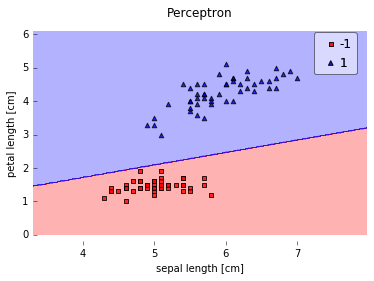

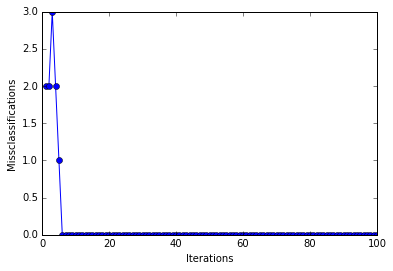

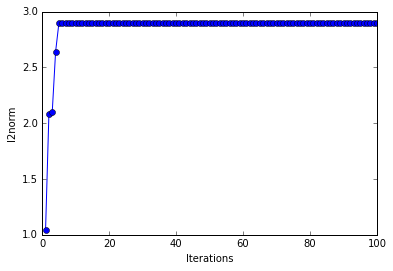

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.evaluate import plot_decision_regions
import numpy as np
import pandas as pd


class Perceptron(object):
    def __init__(self, step=0.001, epochs=100):
        self.step = step
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.l2norm_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.step * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)

            self.l2norm_.append(np.linalg.norm(self.w_, ord=1))
            self.errors_.append(errors)

        return self

    def net_input(self, xi):
        return np.dot(xi, self.w_[1:]) + self.w_[0]

    def predict(self, xi):
        return np.where(self.net_input(xi) >= 0.0, 1, -1)

    
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)


# setosa and versicolor
y = iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = iris.iloc[0:100, [0,2]].values

ppn = Perceptron(epochs=100, step=0.1)

ppn.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()

plt.plot(range(1, len(ppn.l2norm_) + 1), ppn.l2norm_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('l2norm')
plt.show()

Weights: [  2.4   -12.442  -2.648 ...,  -8.186  -4.498  18.212]


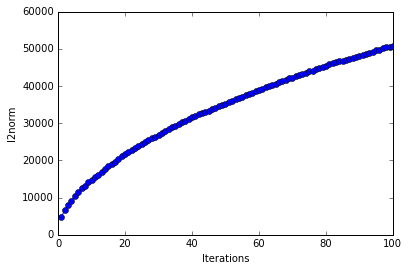

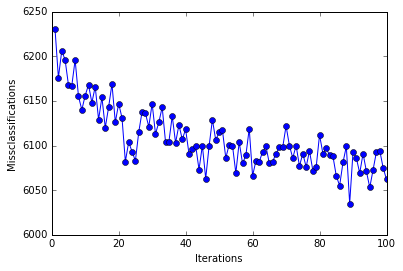

In [10]:
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

# wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
data = unpickle( 'cifar-10-batches-py/data_batch_1' )

features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T

# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1


ppn = Perceptron(epochs=100, step=0.001)

ppn.train(features, labels)

print('Weights: %s' % ppn.w_)

plt.plot(range(1, len(ppn.l2norm_) + 1), ppn.l2norm_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('l2norm')
plt.show()

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Missclassifications')
plt.show()